# Iris Flower Classification Project

### Overview
This notebook will demonstrate the complete pipeline for classifying Iris flowers (using the iris dataset). 
This pipeline includes:
- Data loading and exploratory data analysis (EDA)
- Data preprocessing and train-test data split
- Model training with a baseline classifier
- Model evaluation using accuracy, confusion matrix, and classification report
- Model comparison with multiple classifiers and hyperparameter tuning
- Model interpretability using SHAP
- Saving the final model for deployment 


### Setup and Importing Libraries
In this block, we will import all the necessary Python libraries such as NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn and shap. These libraries are essential for data handling, visualization, and building our machine learning mode

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for dataset, modeling, and evaluation
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Other classifiers for model comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For interpretability of the model
import shap

# Seting the plot styles and enabling inline plotting
sns.set(style="whitegrid")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


e:\Conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Loading and Exploratory Data Analysis (EDA)
We will load the Iris dataset from Scikit-learn, convert it to a Pandas DataFrame, and perform initial EDA to understand the data structure.
This step is critical for understanding the dataset structure before further processing.


In [2]:
# Loading the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display dataset information
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:")
print(data.head())

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Dataset Shape: (150, 5)

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000 

### Data Visualization
Here we visualize the dataset to gain insights into the distribution and relationships between features. We further plot histograms for feature distributions and a pairplot to see how features relate to each other across the species.

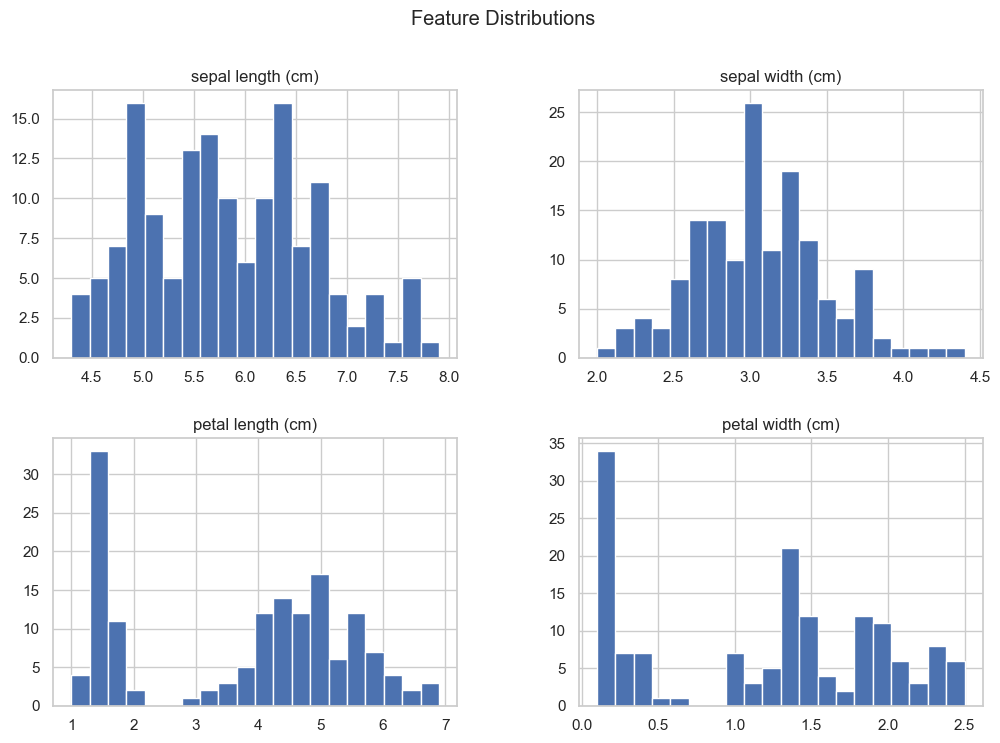

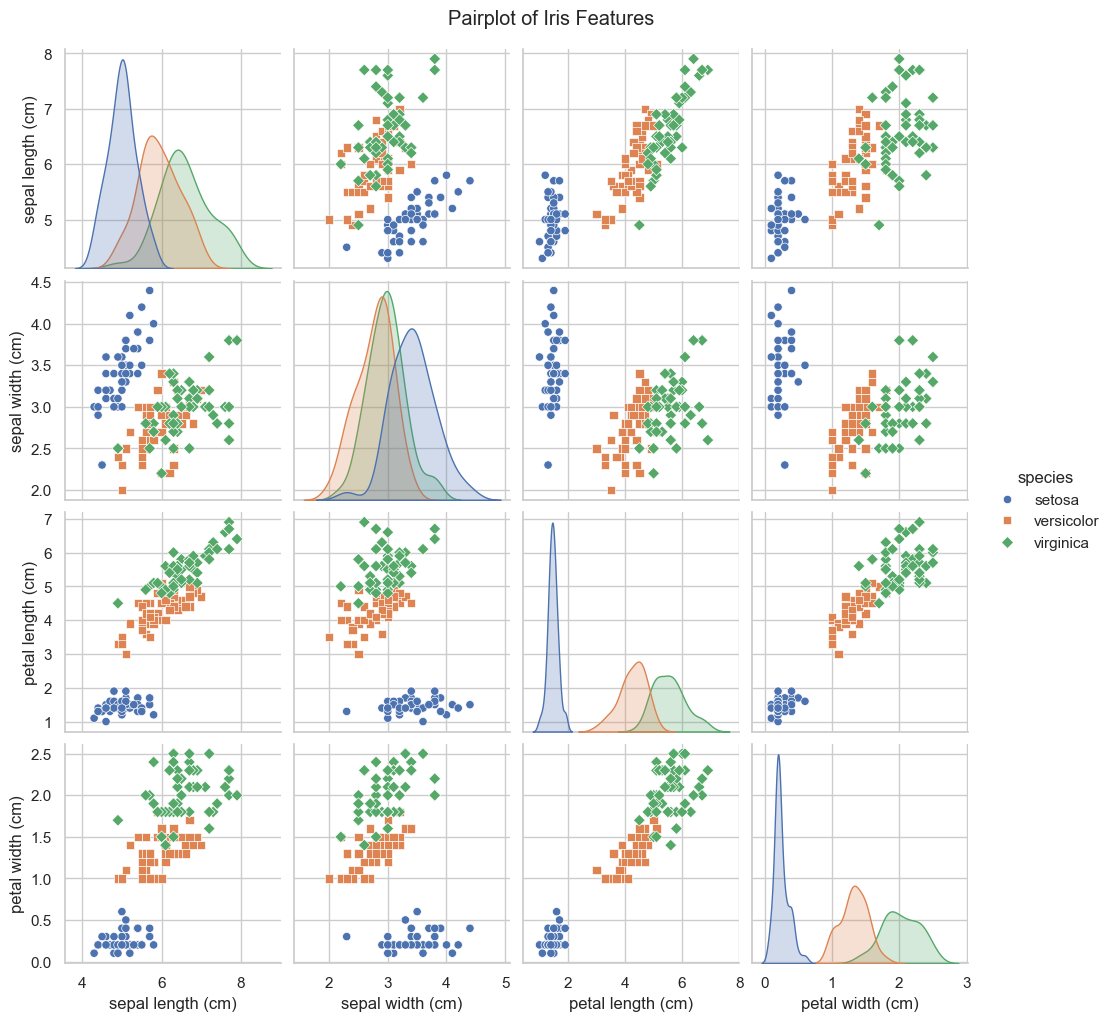

In [3]:
# Histograms for each feature
data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

# Pairplot for relationships between features
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


### Data Preprocessing
We separate the features and target variable, then split the data into training and testing sets. We also scale the features for better model performance.


In [4]:
# Separate features and target variable
X = data.drop("species", axis=1)
y = data["species"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete. Training and testing sets are ready.")


Data preprocessing complete. Training and testing sets are ready.


### Baseline Model Training with Random Forest
In this step, we train a Random Forest Classifier on the training data. Random Forests not only provide high accuracy but also allow us to extract feature importances. We identify the most significant features influencing the classification of Iris species.


Baseline Random Forest Accuracy: 0.8888888888888888


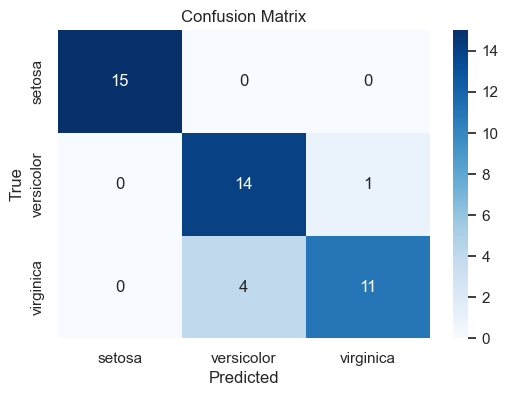


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [5]:
# Train a baseline Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predictions and evaluation on the test set
y_pred = rf_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Baseline Random Forest Accuracy:", accuracy)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Feature Importances:
             Feature  Importance
3   petal width (cm)    0.454892
2  petal length (cm)    0.400227
0  sepal length (cm)    0.120608
1   sepal width (cm)    0.024273


C:\Users\asus\AppData\Local\Temp\ipykernel_18016\439596260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


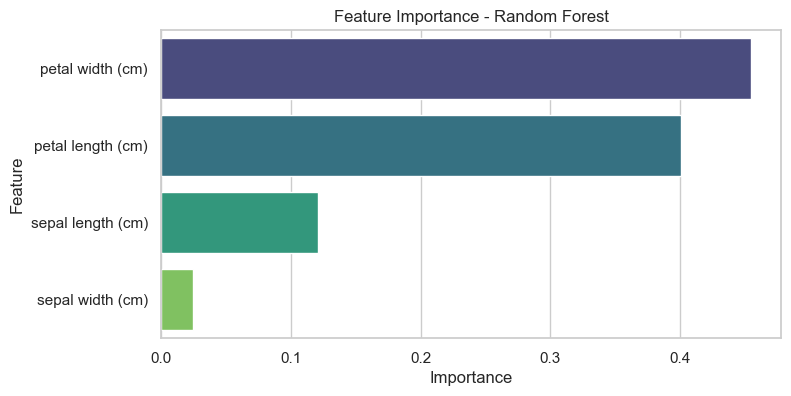

In [6]:
# Extract feature importances
feature_importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()

### Model Comparison & Hyperparameter Tuning
We'll compare multiple models and tune hyperparameters using GridSearchCV to select the best model.


#### **Model Comparison & Ensemble Methods**
Here, first we implement and compare multiple classification algorithms (e.g., Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Gradient Boosting).

We then Use an ensemble approach that combines predictions from various models to potentially boost accuracy.

In [7]:
# Define a dictionary of models for comparison
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Compare models using cross-validation on the training set
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Logistic Regression Accuracy: 0.981 ± 0.023
SVM Accuracy: 0.971 ± 0.023
KNN Accuracy: 0.952 ± 0.043
Gradient Boosting Accuracy: 0.952 ± 0.030


#### **Hyperparameter Tuning and Cross-Validation**

Now, here we use GridSearchCV to optimize the hyperparameters of our model. We also employ cross-validation (e.g., k-fold cross-validation) to ensure our model’s performance is robust across different subsets of data.

In [8]:
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 2, 4, 6]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model for further evaluation
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 2, 'n_estimators': 150}
Best Cross-Validation Score: 0.9619047619047618


### Model Interpretability with SHAP
We use SHAP (SHapley Additive exPlanations) to interpret the best model's predictions by visualizing the feature importances and their impact on the model output.
Alternatively we could have used LIME (Local Interpretable Model-agnostic Explanations).


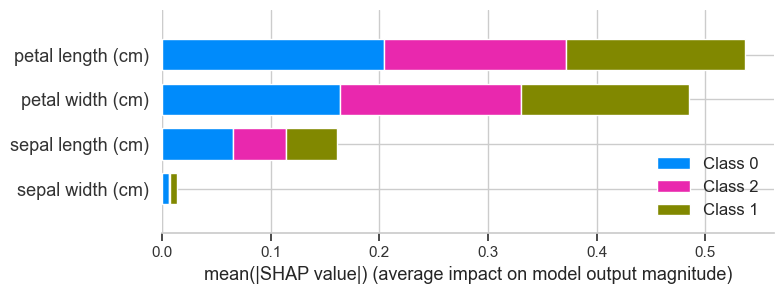

In [9]:
# Fit the best model on the training data (if not already fit)
best_model.fit(X_train_scaled, y_train)

# Initialize SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_train_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train, feature_names=X.columns)


### Save the Final Model
We save the best model and the scaler using pickle. These files will be used later for testing and deployment.

In [10]:
import pickle

# Save the model and scaler to disk
model_filename = '..\\iris_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump({'model': best_model, 'scaler': scaler}, file)

print(f"Model and scaler saved to {model_filename}")


Model and scaler saved to ..\iris_model.pkl


### Conclusion
In this notebook, we walked through the complete process of:
- Loading and exploring the Iris dataset
- Preprocessing and splitting the data
- Training a baseline model and evaluating its performance
- Comparing multiple models and tuning hyperparameters
- Interpreting the model predictions with SHAP
- Saving the final model for future deployment


To conclude our baseline model (Random Forest) achieved an accuracy of 0.88 on the test set. We then compared multiple models and tuned hyperparameters to improve the accuracy to 0.967 using Gradient Boosting. We also visualized feature importances using SHAP to interpret the model predictions.


